In [35]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [36]:
#imdb 데이터 불러오기
#단어사전은 500개까지 만 가져옴
#원핫인코딩하면 500개 컬럼이 만들어짐.
(train_input,train_target),(test_input,test_target)=keras.datasets.imdb.load_data(
    num_words = 500 
)

In [37]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [38]:
#1의 의미:토큰시작
#2의 의미: 단어사전에 없는 단어
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [39]:
#2진 분류binary: 긍정 -1 , 부정- 0 
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [40]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(
    train_input,train_target,test_size=0.2,random_state=42
)

In [42]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [43]:
len(train_input[0])

259

In [45]:
lengths=np.array([len(x) for x in train_input])
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [47]:
np.max(lengths)

1854

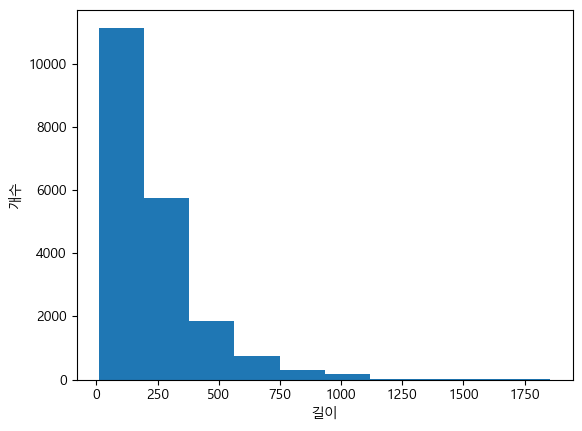

In [46]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()


In [48]:
#시퀀스 패딩

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)

In [49]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [50]:
train_input.shape

(20000,)

In [51]:
train_seq.shape

(20000, 100)

In [52]:
# 시퀀스패딩 적용해서 0이 없으면 글자 짤린것임.
# 시퀀스 패딩은 100개이상의 글자를 짜를때 앞부분을 짜름.(뒤 내용이 더 중요판단)
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [19]:
#6번째 샘플 앞부분 0으로 채워져 있음
#100개 단어보다 적은 데이터 임.
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [54]:
#검증세트
val_seq=pad_sequences(val_input,maxlen=100)
val_seq

array([[ 32,   2, 225, ...,  14,  58,   2],
       [ 53,   2,   8, ...,   7,  32,   2],
       [  0,   0,   0, ...,   2,  33,  32],
       ...,
       [383,   2, 120, ...,  16,  99,  76],
       [106, 345,  12, ..., 120,   2, 156],
       [  4, 114,  21, ...,   4,   2,   2]])

In [53]:
#순환신경망 모델 구현
model=keras.Sequential()
#순환신경망(RNN) 알고리즘

#시퀀스패딩- 크기100, 단어사전-500개
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
#이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))


c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
#fit훈련 데이터 3차원 행렬
train_seq[0]


array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [56]:
train_oh=keras.utils.to_categorical(train_seq)

In [58]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2])

In [60]:
# 원핫인코딩 된 값 출력 - 10번째 값이 1로 변경
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [62]:
# 500개 컬럼의 합은 무조건 1 - 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [63]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 인공신경망 훈련 동일
# Flatten 필요없음. 원핫인코딩
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
                     validation_data=(val_oh,val_target), 
                     callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5001 - loss: 0.6989 - val_accuracy: 0.4996 - val_loss: 0.6971
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5081 - loss: 0.6942 - val_accuracy: 0.5036 - val_loss: 0.6953
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5198 - loss: 0.6915 - val_accuracy: 0.5070 - val_loss: 0.6940
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5307 - loss: 0.6901 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5365 - loss: 0.6894 - val_accuracy: 0.5194 - val_loss: 0.6920
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5420 - loss: 0.6878 - val_accuracy: 0.5234 - val_loss: 0.6910
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5475 - loss: 0.6857 - val_accuracy: 0.5294 - val_loss: 0.6902
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5507 - loss: 0.6854 - 

In [66]:
plt.plot(history,history['loss'])
plt.xlabel()
plt.ylabel
plt.show()

TypeError: 'History' object is not subscriptable

In [ ]:
#stop위치 출력
early_stoppping_cb.stopped_epoch

In [67]:


test_seq = pad_sequences(test_input,maxlen=100)
#원핫 인코딩


단어 임베딩

In [71]:
model2=keras.Sequential()
#임베딩층 추가
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [72]:
# 인공신경망 훈련 동일
# Flatten 필요없음. 원핫인코딩을 사용하지 않음, embedding을 사용
#train_oh ->train_seq 데이터 사용
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_embedding_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,
                     validation_data=(val_seq,val_target), 
                     callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5089 - loss: 0.6937 - val_accuracy: 0.5454 - val_loss: 0.6885
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5898 - loss: 0.6801 - val_accuracy: 0.6350 - val_loss: 0.6663
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6551 - loss: 0.6576 - val_accuracy: 0.6764 - val_loss: 0.6459
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6946 - loss: 0.6340 - val_accuracy: 0.7134 - val_loss: 0.6257
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7272 - loss: 0.6127 - val_accuracy: 0.7292 - val_loss: 0.6036
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7381 - loss: 0.5938 - val_accuracy: 0.7306 - val_loss: 0.5880
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7501 - loss: 0.5713 - val_accuracy: 0.7494 - val_loss: 0.5643
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7614 - loss: 0.5482 - val_ac

In [73]:
test_seq=pad_sequences(test_input,maxlen=100)
model2.evaluate(test_seq,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7909 - loss: 0.4579


[0.4582229554653168, 0.788919985294342]

In [ ]:
# 딥러닝 훈련
# 데이터전처리 train_scaled = train_input.reshape(-1,28,28,1)/255
# 모델결정 model = keras.Sequential()
#model2.add(keras.layers.Embedding(500,16,input_length=100))


# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_targ

#test세트 검증-3차원행렬로 변경해서 test진행해야 함.
#시퀀스 패딩
# test_seq = pad_sequences(test_input,maxlen=100)
#원핫인코딩
#train_oh=kera.utils.to_categorical(test_seq)
#model.evaluate(train_oh,test_target)

In [ ]:
# # 인공신경망 훈련 동일
# # Flatten 필요없음. 원핫인코딩
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True )
# history = model.fit(train_oh,train_target,batch_size=64,epochs=100,
#                      validation_data=(val_oh,val_target), 
#                      callbacks=[checkpoint_cb,early_stopping_cb])